 # Will a Customer Accept the Coupon?

## Abstract

The goal of this project is distinguish between customers who accepted a coupon versus those that did not accept the coupon recommended to them in different driving scenarios.

## Business Understanding

Analyse the data of coupon offerings (bar, restaurant, coffee house, etc.), contextual attributes (driving destination, locacation of user, weather, etc.)  and user attributes (Gender, Age, Marital Status, etc.) to see which factors influnced more on accepting the coupons. This analysis helps the companies to offer the right coupon based on the user and context. Correct coupon offerings increases the customer base, which can lead to enhancement of companies profits.

## Data Understanding

This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he/she will accept the coupon if he/she is the driver.

**Dataset:** coupon.csv

**Data Description:**

1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day
 
 
4. Target attribute
    - Y: Whether the coupon is accepted or not accepted, 1:accepeted,2:not accepted 

## Data Cleaning

### Load the data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/coupons.csv')
print(f' Orignal datasetset shape {data.shape}')

 Orignal datasetset shape (12684, 26)


### Duplicate Rows
1. Identify the duplicate rows 
2. Remove the duplicate rows 
3. Document the findings

#### Identify the duplicate rows

In [3]:
duplicate_rows = data.duplicated().sum()
print(f' Orignal datasetset has {duplicate_rows} duplicate rows')

 Orignal datasetset has 74 duplicate rows


#### Remove duplicate rows

In [4]:
data = data.drop_duplicates()
print(f' Datasetset shape after removing duplicates {data.shape}')

 Datasetset shape after removing duplicates (12610, 26)


#### Findings
- Original dataset has 12684 rows and 26 columns
- Orignal dataset has 74 duplicate rows
- <B>After removing duplicate rows, there are 12610 rows

### Missing Values
1. Check for missing values
2. Handle the missing values
    - Remove rows having missing values or
    - Drop the feature that has too many missing vlaues or
    - Fill in the missing values
3. Document the findings


#### Are there any missing values?

In [5]:
print(f' Are there any missing values in the dataset: {data.isnull().values.any()}')

 Are there any missing values in the dataset: True


#### Missing values visualization

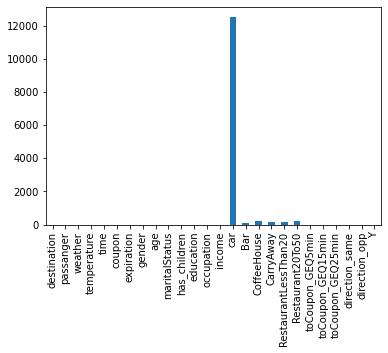

In [6]:
data.isna().sum().plot(kind="bar")
plt.show()

#### Percentage of missing values per feature

In [7]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df[missing_value_df.percent_missing != 0]

,column_name,percent_missing
car,car,99.143537
Bar,Bar,0.848533
CoffeeHouse,CoffeeHouse,1.720856
CarryAway,CarryAway,1.189532
RestaurantLessThan20,RestaurantLessThan20,1.022998
Restaurant20To50,Restaurant20To50,1.498810


#### Findings
1. There are six columns with missing values and more than 99% of the 'car' feaure values are missing. We will go by the idea of dropping the feature tha has too many missing values.
2. Other missing values features have about 1% of the total data missing, these values can be filled.

#### Dropping car attribute and Filling missing values

In [8]:
data.drop(columns=['car'], inplace=True)

In [9]:
na_data = data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']]
na_data.dtypes

Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
dtype: object

As all of the missing values column data type is an object, so we can use mode imputation for missing values.

In [10]:
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])

In [11]:
print(f' Are there any more missing values in the dataset after filling: {data.isnull().values.any()}')

 Are there any more missing values in the dataset after filling: False


#### Findigs
1. There were missing values in the dataset
2. There are six columns with missing values and more than 99% of the 'car' feaure values are missing. 
3. Other missing values features have about 1% of the total data missing, these values can be filled.
4. <B> Dropped the car column/feature as it is having too many missing values.
5. <B> Mode imputation used to fill the missing values for the features that are having low % of missing values

### Data Type Change
**Replace values and Change Datatype of age from object to int**

In [12]:
data = data.replace('50plus', '51', regex=True)
data = data.replace('below21', '20', regex=True)
#data['age'].value_counts()
data['age'] = data['age'].astype('int64')
#data.info()

## Exploratory Data Analysis

**What proportion of the total observations chose to accept the coupon?**

In [13]:
accepted_or_not = data['Y'].value_counts()
print(f'Accepted Count: {accepted_or_not[1]}, Percent Accepted: {round(accepted_or_not[1]/data.shape[0]*100,2)}%')
print(f'Not Accepted Count: {accepted_or_not[0]}, Percent Not Accepted: {round(accepted_or_not[0]/data.shape[0]*100,2)}%')


Accepted Count: 7157, Percent Accepted: 56.76%
Not Accepted Count: 5453, Percent Not Accepted: 43.24%


#### Findings
- <B> 56.76% of total observation chose to accept the coupons

**Use a bar plot to visualize the coupon column.**

<AxesSubplot:title={'center':'Coupon Accepted and Not Accepted Counts'}, xlabel='coupon'>

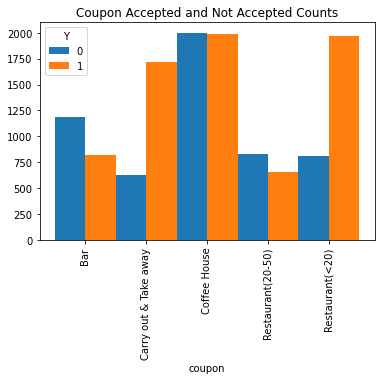

In [14]:
data.groupby('Y').coupon.value_counts().unstack(0).plot.bar(title='Coupon Accepted and Not Accepted Counts',width=1.0)

#### Findings
- <B> Higher percentage of Restaurant(<20) and Carry out & Take away coupons accepted

**Use a histogram to visualize the temperature column.**

In [15]:
data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


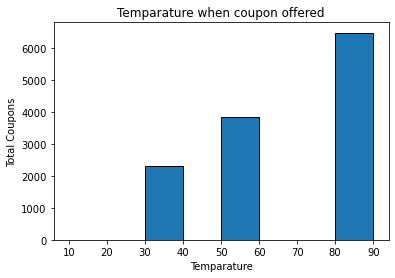

In [16]:
temparature = data['temperature']
bins = [10,20,30,40,50,60,70,80,90]
plt.hist(temparature,bins, edgecolor = 'black')
plt.title('Temparature when coupon offered')
plt.xlabel('Temparature')
plt.ylabel('Total Coupons')
plt.show()

#### Findings
- <B> More than 50% of the coupons were offered when temparature was between 80 to 90 degrees fahrenheit

**Investigating the Bar Coupons**

1. Bar Coupons DataFrame

In [17]:
bar_coupons_df = data[data['coupon'] == 'Bar']
bar_coupons_df.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. What proportion of bar coupons were accepted?

In [18]:
bar_coupons_df.shape

(2010, 25)

In [19]:
barcpns_accept_or_not = bar_coupons_df['Y'].value_counts()
print(f'Bar Coupons Accepted Count: {barcpns_accept_or_not[1]}, Percent Accepted: {round(barcpns_accept_or_not[1]/bar_coupons_df.shape[0]*100,2)}%')

Bar Coupons Accepted Count: 824, Percent Accepted: 41.0%


#### Findings
- <B> 41.0 % of Bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [20]:
barcpns_less3_df = bar_coupons_df[bar_coupons_df['Bar'].isin(['never','less1','1~3'])]
barcpns_accept_or_not = barcpns_less3_df['Y'].value_counts()
print(f'Acceptance rate of customers who went to a bar 3 or fewer times a month: {round(barcpns_accept_or_not[1]/barcpns_less3_df.shape[0]*100,2)}%')
barcpns_more3_df = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8','gt8'])]
barcpns_accept_or_not = barcpns_more3_df['Y'].value_counts()
print(f'Acceptance rate of customers who went to a bar more than 3 times a month: {round(barcpns_accept_or_not[1]/barcpns_more3_df.shape[0]*100,2)}%')

Acceptance rate of customers who went to a bar 3 or fewer times a month: 37.05%
Acceptance rate of customers who went to a bar more than 3 times a month: 76.88%


#### Findings
- <B> Customers who went to bar 3 or fewer times accepted 37.05% of coupons offered
- <B> Customers who went to bar more than 3 times accepted 76.88% of coupons offered

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [21]:
bar_coupons_df.shape

(2010, 25)

In [22]:
dr_gt1_df = bar_coupons_df[bar_coupons_df['Bar'].isin(['gt8','4~8','1~3'])]
dr_gt1_age_gt25_df = dr_gt1_df[dr_gt1_df['age']>25]
dr_gt1_age_gt25_df.shape

(420, 25)

In [23]:
bar_cpns_allothers_df = bar_coupons_df.drop(dr_gt1_age_gt25_df.index)
bar_cpns_allothers_df.shape

(1590, 25)

In [24]:
barcpns_accept_or_not = dr_gt1_age_gt25_df['Y'].value_counts()
print(f'Acceptance rate of drivers go to a bar more than once a month with age >25: {round(barcpns_accept_or_not[1]/dr_gt1_age_gt25_df.shape[0]*100,2)}%')
barcpns_accept_or_not = bar_cpns_allothers_df['Y'].value_counts()
print(f'Acceptance rate of all others: {round(barcpns_accept_or_not[1]/bar_cpns_allothers_df.shape[0]*100,2)}%')

Acceptance rate of drivers go to a bar more than once a month with age >25: 69.52%
Acceptance rate of all others: 33.46%


#### Findings
- <B> Yes there is a difference in the acceptance rate of coupons between the drivers go to a bar more than once with age > 25 to all others.
- <B> Acceptance rate of drivers go to a bar more than once a month with age >25 is 69.52%
- <B> Acceptance rate of all others is 33.46%

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

In [25]:
# drivers who go to bars more than once df is dr_gt1_df
barcpns_accept_or_not = dr_gt1_df['Y'].value_counts()
print(f'Acceptance rate of drivers go to a bar more than once a month: {round(barcpns_accept_or_not[1]/dr_gt1_df.shape[0]*100,2)}%')
# No kids
psgrs_notkid_df = dr_gt1_df[~dr_gt1_df['passanger'].isin(['Kid(s)'])]
# Occupation other than farming, fishing, or forestry
psgrs_notkid_df = psgrs_notkid_df[~psgrs_notkid_df['occupation'].isin(['farming','fishing','forestry'])]
barcpns_accept_or_not = psgrs_notkid_df['Y'].value_counts()
print(f'Acceptance rate of drivers with no kid as passenger: {round(barcpns_accept_or_not[1]/psgrs_notkid_df.shape[0]*100,2)}%')


Acceptance rate of drivers go to a bar more than once a month: 68.79%
Acceptance rate of drivers with no kid as passenger: 71.32%


#### Findings
- Drivers that go to bar more than once accepts 68.79% of coupons
- Drivers that go to bar more than once with no kid passenger accepts 71.32% of coupons
- <B> Drivers with no kid passenger accepts more bar coupons
    

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [26]:
# drivers who go to bars more than once df is dr_gt1_df
dr_gt1_pass_notkid_df = dr_gt1_df[~dr_gt1_df['passanger'].isin(['Kid(s)'])]
dr_gt1_pass_notkid_ms_notwidowed_df = dr_gt1_df[~dr_gt1_df['maritalStatus'].isin(['widowed'])]
barcpns_accept_or_not = dr_gt1_pass_notkid_ms_notwidowed_df['Y'].value_counts()
print(f'Acceptance rate of drivers go to bar more than once, not widowed and with no kid as passenger: {round(barcpns_accept_or_not[1]/dr_gt1_pass_notkid_ms_notwidowed_df.shape[0]*100,2)}%')
dr_gt1_age_lt30_df = dr_gt1_df[dr_gt1_df['age']<30]
barcpns_accept_or_not = dr_gt1_age_lt30_df['Y'].value_counts()
print(f'Acceptance rate of drivers go to bar more than once with age < 30: {round(barcpns_accept_or_not[1]/dr_gt1_age_lt30_df.shape[0]*100,2)}%')
# get the bar coupons df and filter based on the visit of the restaurants and income
dr_restgt4_df = bar_coupons_df[bar_coupons_df['RestaurantLessThan20'].isin(['4~8','gt8'])]
dr_restgt4_income_df = dr_restgt4_df[dr_restgt4_df['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'])]
barcpns_accept_or_not = dr_restgt4_income_df['Y'].value_counts()
print(f'Acceptance rate of drivers go to resturant more than 4 times with income < 50k: {round(barcpns_accept_or_not[1]/dr_restgt4_income_df.shape[0]*100,2)}%')



Acceptance rate of drivers go to bar more than once, not widowed and with no kid as passenger: 68.79%
Acceptance rate of drivers go to bar more than once with age < 30: 72.17%
Acceptance rate of drivers go to resturant more than 4 times with income < 50k: 45.35%


#### Findings
- Drivers go to bar more than once, not widowed and with no kid as passenger accepts 68.79% of coupons.
- Drivers go to bar more than once with age < 30 accepts 72.17% of coupons
- Drivers go to resturant more than 4 times with income < 50k accepts 45.35% of coupons
- <B> Drivers with low income accepts lower percentage of bar coupons

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Hypothesize about drivers who accpeted the bar coupons:**
- Total bar coupons offered = <B>2010
- Total Bar coupons accepted = 824 (<B>41%)
- Customers who go to bar frequently (more than 3 times a month) has highest % of acceptance rate: <B>76.88%
- <B> Drivers with no kid passenger accepts higher percentage of bar coupons
- <B> Drivers with low income accepts lower percentage of bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Coffee Coupons

1. Coffee Coupon DataFrame

In [27]:
coffee_coupons_df = data[data['coupon'] == 'Coffee House']
#coffee_coupons_df.value_counts()
coffee_coupons_df.head(3)                 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of coffee coupons were accepted?

In [28]:
coffee_coupons_df.shape

(3989, 25)

In [29]:
cof_cpns_accepted_or_not = coffee_coupons_df['Y'].value_counts()
print(f'Coffee Coupons Accepted Count: {cof_cpns_accepted_or_not[1]}, Percent Accepted: {round(cof_cpns_accepted_or_not[1]/coffee_coupons_df.shape[0]*100,2)}%')

Coffee Coupons Accepted Count: 1989, Percent Accepted: 49.86%


#### Findings
- <B> About 50% coffee coupons were accepted

3. Compare the acceptance rate between male and female who accepted the coffee coupons


<AxesSubplot:xlabel='Y'>

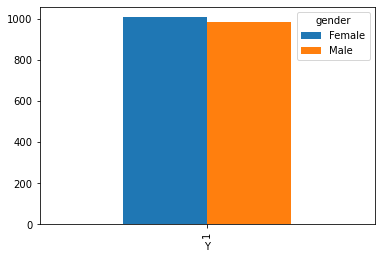

In [30]:
coffee_coupons_accepted_df = coffee_coupons_df[coffee_coupons_df['Y'] == 1]
coffee_coupons_accepted_df.groupby('gender').Y.value_counts().unstack(0).plot.bar()

In [31]:
coffee_coupons_df['gender'].value_counts()

Female    2048
Male      1941
Name: gender, dtype: int64

In [32]:
coffee_coupons_male_df = coffee_coupons_df[coffee_coupons_df['gender'] == 'Male']
coupons_accept_or_not = coffee_coupons_male_df['Y'].value_counts()
print(f'Coupon acceptance rate of Male drivers: {round(coupons_accept_or_not[1]/coffee_coupons_male_df.shape[0]*100,2)}%')
coffee_coupons_female_df = coffee_coupons_df[coffee_coupons_df['gender'] == 'Female']
coupons_accept_or_not = coffee_coupons_female_df['Y'].value_counts()
print(f'Coupon acceptance rate of Female drivers: {round(coupons_accept_or_not[1]/coffee_coupons_female_df.shape[0]*100,2)}%')

Coupon acceptance rate of Male drivers: 50.59%
Coupon acceptance rate of Female drivers: 49.17%


#### Findings
- <B> Almost equal percentage of coffee coupons accepted irrespective of the gender

4. Compare the acceptance rate of coffee coupons by Marital Status

<AxesSubplot:title={'center':'Cofee Coupons Accepted By Martial Status'}>

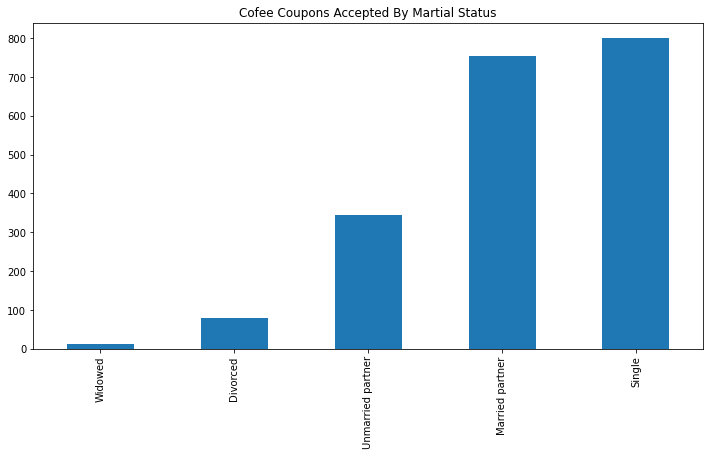

In [33]:
coffee_coupons_accepted_df['maritalStatus'].value_counts().sort_values().plot(kind = 'bar', title='Cofee Coupons Accepted By Martial Status', figsize=(12,6))

5. Compare the acceptance rate of coffee coupons by type of passenger using bar plot visualization

<AxesSubplot:title={'center':'Coffee Coupon Accepted and Not Accepted Counts'}, xlabel='passanger'>

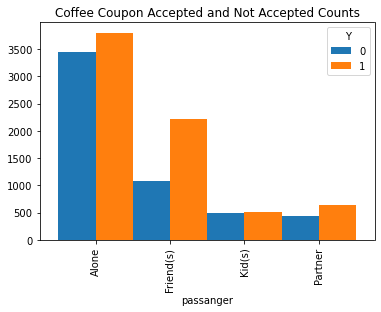

In [34]:
data.groupby('Y').passanger.value_counts().unstack(0).plot.bar(title='Coffee Coupon Accepted and Not Accepted Counts',width=1.0)

6. Based on these observations, what do you hypothesize about drivers who accepted the coffee coupons?

**Hypothesize about drivers who accpeted Cofee Coupons:**
- Total Coffee coupons offered = <B>3989
- Total Coffee coupons accepted = <B>1989 (49.86%)
- <B> Drivers with friend(s) as passenger accepts higher percentage of coffee coupons.
- <B> Approximtely same percentage of coffee coupons accepted by gender basis